# Imports

In [39]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl
import statsmodels.formula.api as smf
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.linear_model import BayesianRidge
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

# Load Data

In [76]:
df = pd.read_csv('Data/master_updated.csv', index_col='District')
df.drop('Unnamed: 0', axis=1, inplace=True)

X = df.iloc[:, range(42)]
X_novacc = X.iloc[:, range(25) + range(38,42)]
Y = df.iloc[:, range(42, 64)]

# What does the disease data look like?

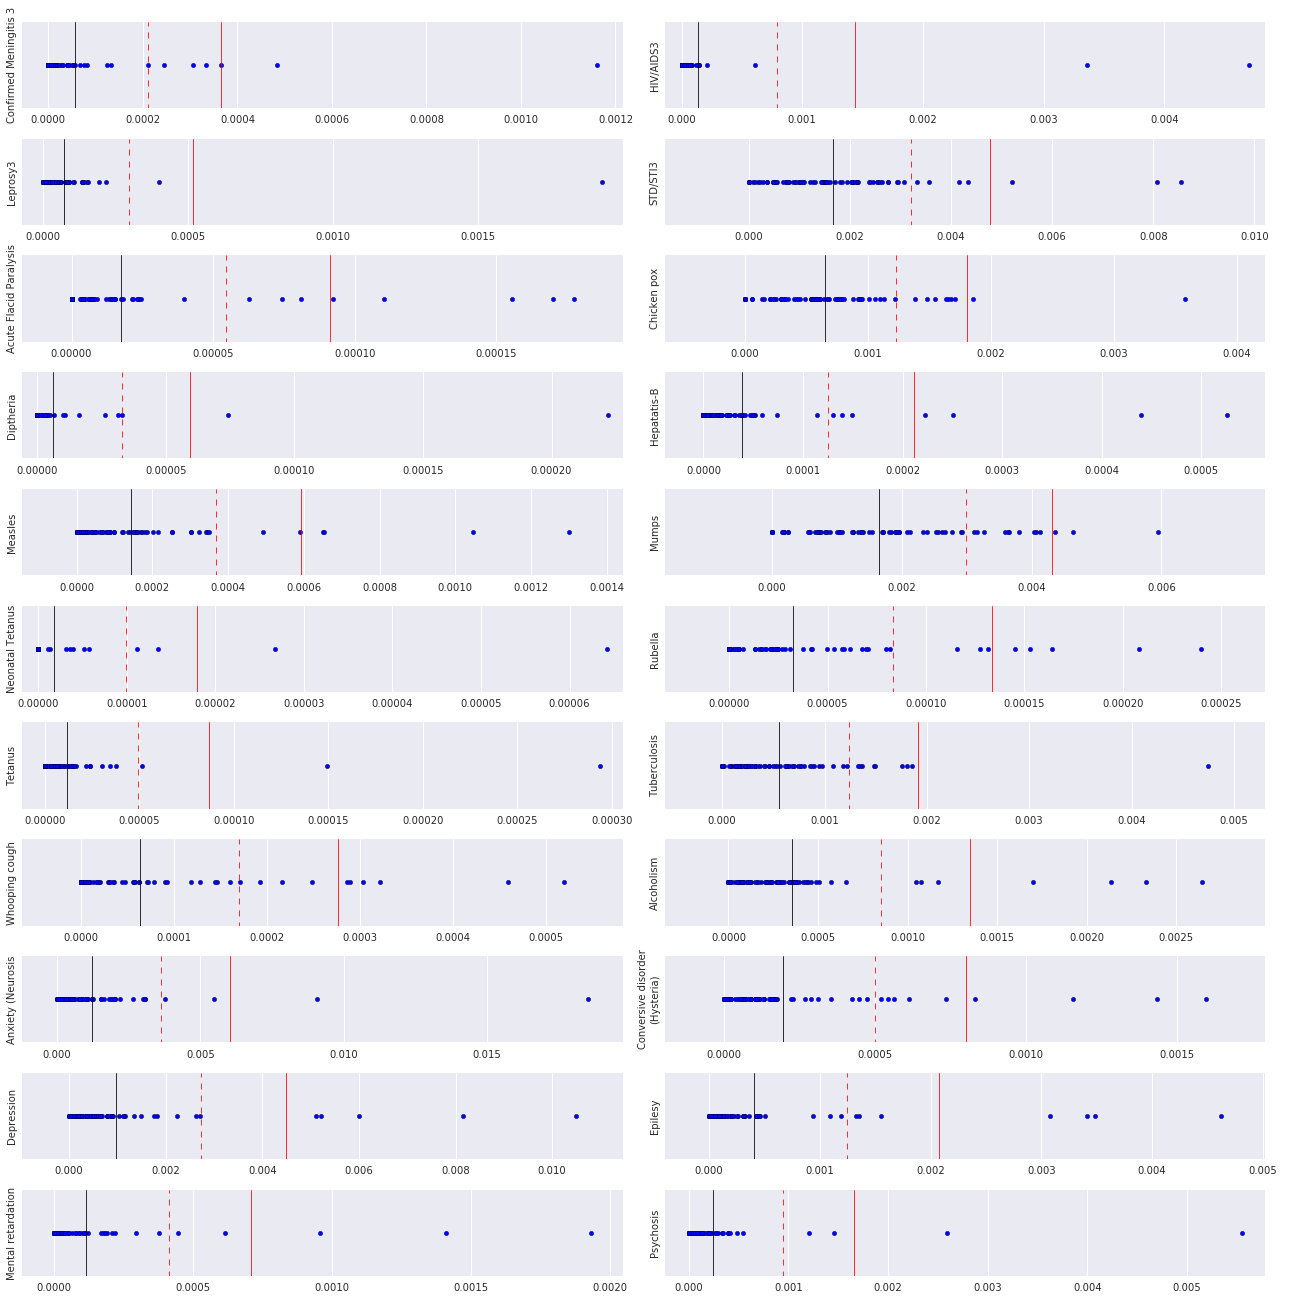

In [20]:
# Plot by groups
fig, ([ax1, ax2], [ax3, ax4],
      [ax5, ax6], [ax7, ax8],
      [ax9, ax10], [ax11, ax12],
      [ax13, ax14], [ax15, ax16],
      [ax17, ax18], [ax19, ax20],
      [ax21, ax22],) = pl.subplots(nrows = 11, ncols = 2, figsize = (18, 18))

fig.tight_layout(h_pad=1)

for i in enumerate(fig.axes):
    i[1].axes.get_yaxis().set_ticks([])
    i[1].axvline(x=np.array(Y[[i[0]]]).mean(), ymin=-1, ymax=1, c='k', lw=0.8)
    i[1].axvline(x=np.array(Y[[i[0]]]).mean()+np.array(Y[[i[0]]]).std(), ymin=-1, ymax=1, c='r', ls='--', lw=0.8)
    i[1].axvline(x=np.array(Y[[i[0]]]).mean()+np.array(Y[[i[0]]]).std()*2, ymin=-1, ymax=1, c='r', lw=0.8)
    i[1].scatter(Y[[i[0]]], np.zeros(Y[[i[0]]].shape))
    i[1].set_xlim(np.array(Y[[i[0]]]).min() - np.array(Y[[i[0]]]).mean(),
                 np.array(Y[[i[0]]]).max() + np.array(Y[[i[0]]]).mean())
    i[1].set_ylabel(Y[[i[0]]].columns[0], fontsize = 10)

# Bayesian Ridge Model Scoring

In [13]:
model = BayesianRidge(compute_score=True)
for i in range(22):
    model.fit(X, Y[[i]])
    print Y[[i]].columns[0] + ': ', str(model.score(X, Y[[i]]))

Confirmed Meningitis 3:  0.132799888207
HIV/AIDS3:  0.139251538408
Leprosy3:  0.113632565223
STD/STI3:  0.179732866664
Acute Flacid Paralysis:  0.125809032432
Chicken pox:  0.392459008645
Diptheria:  0.146721771629
Hepatatis-B:  0.443762315653
Measles:  0.210385600277
Mumps:  0.39449731539
Neonatal Tetanus:  0.185926779594
Rubella:  0.163612725989
Tetanus:  0.123417097808
Tuberculosis:  0.206154430325
Whooping cough:  0.1524019586
Alcoholism:  0.258052564958
Anxiety (Neurosis:  0.10595496823
Conversive disorder
(Hysteria):  0.186643726952
Depression:  0.134399309564
Epilesy:  0.147264229418
Mental retardation:  0.153752795613
Psychosis:  0.1244653821


# Linear Regression

In [99]:
# Including vaccines in data X.
reg_summary = []
for i in range(Y.shape[1]):
    reg = smf.OLS(Y.iloc[:, i], X).fit()
    try:
        reg1 = smf.OLS(Y.iloc[:, i], X[reg.pvalues[reg.pvalues < 0.05].index]).fit()
    except:
        pass
    d = [Y.iloc[:, i].name, reg.rsquared, reg.rsquared_adj, reg.f_pvalue,
         list(reg.pvalues[reg.pvalues < 0.05].index), reg1.rsquared, reg1.rsquared_adj, reg1.f_pvalue,]
    reg_summary.append(d)

pd.DataFrame(reg_summary,
             columns=['Variable', 'RSquared', 'RsquaredAdj', 'ProbFStat', 'SigVars',
                      'SV_RSquared', 'SV_RsquaredAdj', 'SV_ProbFStat']
            ).sort_values('ProbFStat', ascending=True)

,Variable,RSquared,RsquaredAdj,ProbFStat,SigVars,SV_RSquared,SV_RsquaredAdj,SV_ProbFStat
5,Chicken pox,0.894706,0.768352,2.235153e-08,"[Poverty Gap, Poverty Incidence, Poverty Sever...",0.768937,0.749410,1.063356e-20
9,Mumps,0.878117,0.731856,2.040827e-07,"[Mtn/Hill Janajati A, Tarai Janajati]",0.646641,0.637218,1.143128e-17
3,STD/STI3,0.834737,0.636421,1.644887e-05,"[People not expected to survive age 40, HDI , ...",0.612750,0.597051,3.117553e-15
2,Leprosy3,0.834602,0.636124,1.663578e-05,"[Hill Brahman, Madhesi Dalit, Mtn/Hill Janajat...",0.615717,0.537659,4.413739e-09
1,HIV/AIDS3,0.834340,0.635548,1.700408e-05,"[Mtn/Hill Janajati A, Other undefined, People ...",0.485501,0.425849,1.119739e-07
15,Alcoholism,0.819473,0.602840,5.494315e-05,"[Hill Brahman, Musalman, Other undefined, Peop...",0.547196,0.494697,1.915993e-09
13,Tuberculosis,0.787685,0.532906,4.548555e-04,"[Hill Brahman, Deprivation in economic provisi...",0.564398,0.534148,7.605739e-12
8,Measles,0.732741,0.412030,6.900955e-03,"[Newar, Poverty Severity, Measles 12-23 3, TT23]",0.327422,0.290569,6.681962e-06
17,Conversive disorder\n(Hysteria),0.731401,0.409083,7.288955e-03,"[Hill Brahman, Mtn/Hill Janajati B, Musalman, ...",0.478871,0.409898,4.971680e-07
21,Psychosis,0.714583,0.372083,1.392469e-02,"[Hill Brahman, Musalman, People not expected t...",0.341487,0.285838,3.212448e-05


In [100]:
# Excluding vaccines in X.
reg_summary = []
for i in range(Y.shape[1]):
    reg = smf.OLS(Y.iloc[:, i], X_novacc).fit()
    try:
        reg1 = smf.OLS(Y.iloc[:, i], X_novacc[reg.pvalues[reg.pvalues < 0.05].index]).fit()
    except:
        pass
    d = [Y.iloc[:, i].name, reg.rsquared, reg.rsquared_adj, reg.f_pvalue,
         list(reg.pvalues[reg.pvalues < 0.05].index), reg1.rsquared, reg1.rsquared_adj, reg1.f_pvalue,]
    reg_summary.append(d)

pd.DataFrame(reg_summary,
             columns=['Variable', 'RSquared', 'RsquaredAdj', 'ProbFStat', 'SigVars',
                      'SV_RSquared', 'SV_RsquaredAdj', 'SV_ProbFStat']
            ).sort_values('ProbFStat', ascending=True)

,Variable,RSquared,RsquaredAdj,ProbFStat,SigVars,SV_RSquared,SV_RsquaredAdj,SV_ProbFStat
5,Chicken pox,0.857036,0.770661,4.290666e-12,"[Poverty Gap, Poverty Severity, Adult illitera...",0.766591,0.746867,1.512935e-20
9,Mumps,0.845616,0.752342,2.284845e-11,"[Mtn/Hill Janajati A, Sanitation Coverage (%, ...",0.625636,0.610459,9.001751e-16
3,STD/STI3,0.765450,0.623743,1.466681e-07,"[Sanitation Coverage (%, Water Coverage Supply...",0.084003,0.059577,3.724128e-02
2,Leprosy3,0.712592,0.538950,7.792116e-06,"[Poverty Severity, People not expected to surv...",0.562650,0.525691,4.014870e-11
1,HIV/AIDS3,0.693325,0.508043,2.619653e-05,"[Other undefined, Deprivation in economic prov...",0.553110,0.501297,1.255110e-09
15,Alcoholism,0.662266,0.458218,1.494865e-04,"[Hill Brahman, Sanitation Coverage (%, Water C...",0.391216,0.366536,4.687009e-08
13,Tuberculosis,0.639818,0.422208,4.558917e-04,[Total Pop Census],0.404216,0.396377,4.002306e-10
7,Hepatatis-B,0.604142,0.364977,2.163686e-03,"[Tarai Janajati, Total Pop Census]",0.322604,0.304540,4.535242e-07
14,Whooping cough,0.591466,0.344643,3.552925e-03,[Newar],0.158768,0.147699,3.025453e-04
18,Depression,0.550695,0.279240,1.459790e-02,"[Hill Brahman, Mtn/Hill Janajati A, Adult illi...",0.384075,0.350325,3.121841e-07
